# Matrix multiplication (8pt)

In [1]:
# Load the necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.image import imread
import matplotlib.pyplot as plt

    1. (6pt) Multiply these matrices/vectors manually. Show the math you do while solving these.
    Note: you can do this on paper, just include a picture of your solution.

![image info](manual_matrix.jpg)

    2. (2pt) now check your results on computer. You should get the same results.

In [2]:
# Check result for 1a
print('Check for 1a:')
print(np.array([[0, 7], [5, 3]]) @ np.array([[1, 0], [0, -1]]))
# Check result for 1b
print('Check for 1b:')
print('Cannot perform matrix multiplication, violates the rule. Python will print error message.')
# Check result for 1c
print('Check for 1c:')
print(np.array([[0, 7], [5, 3]]) @ np.array([[1, 0, 0], [0, -1, 1]]))
print("The results match the results done manually in question 1")

Check for 1a:
[[ 0 -7]
 [ 5 -3]]
Check for 1b:
Cannot perform matrix multiplication, violates the rule. Python will print error message.
Check for 1c:
[[ 0 -7  7]
 [ 5 -3  3]]
The results match the results done manually in question 1


# Rotate Crazy Hat (21pt)

    1. (1pt) Read the data points from “crazy_hat.tsv” (available on canvas) from disk. A small excerpt of it looks like this:

In [3]:
# Load the data points from crazy_hat.tsv
ch = pd.read_csv('/home/jovyan/INFO371PS/Data/crazy-hat.tsv', sep="\t")
ch.head()

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye


    2. (3pt) Separate data into a coordinate matrix (call this X) and group id-s (call this groups). You can get matrix out of data frame columns with the .values attribute.
    Note that when you rotate the image below, you only have to manipulate X, groups will remain the same.

In [4]:
# Seperate data into a coordinate matrix and group ids
X, groups = ch[['x', 'y']].values, ch.group

    3. (5pt) Plot the figure: plot all x-ypairs and sequentially connect the dots. Pay attention to connect correct groups but not to connect wrong groups.
    Hint: you can do this by a loop over unique group values (remember np.unique), and by plotting and connecting only points for this group inside the loop.
    Hint 2: normally data plotting does not care about x/yscales. You may want to force both to be in the same scale with

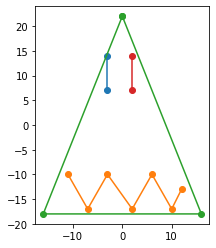

In [5]:
ax = plt.subplot(1, 1, 1)
for group in np.unique(groups):
    X_group = X[groups == group]
    ax.plot(X_group[:,0], X_group[:,1], marker="o")
ax.set_aspect("equal")
plt.show()

    4. (4pt) Convert your plotting code into a function that takes two (or more if you wish, like color, image size, etc) arguments: Xand groups. Demonstrate that the function works with Crazy Hat data.

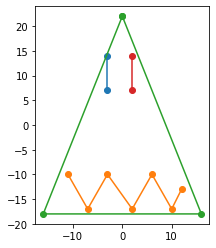

In [6]:
# Convert the plotting code into a function that takes two parameters X and groups and returns the plot
def hat_plot (X, groups):
    ax = plt.subplot(1, 1, 1)
    for group in np.unique(groups):
        X_group = X[groups == group]
        ax.plot(X_group[:,0], X_group[:,1], marker="o")
    ax.set_aspect("equal")
    plt.show()
# Prove that the function works   
hat_plot(X, groups)

    5. (4pt) Now create a function Rot that takes the angle α, and returns the rotation matrix to rotate image by this angle. Check out np.sin, np.cos, and remember that radians =π·degrees/180.
    Note: you can achieve the results here in different ways, but your code will be clean and easy to follow if you follow the advice here: a plotting function that takes in the coordinate matrix, and a function that returns the rotation matrix.

In [7]:
# Create a function Rot that takes takes a parameter a and 
# returns the rotation matrix to rotate image by this angle
def Rot(a):
    angle = np.pi*a/180
    matrix = np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])
    return matrix

    6. (4pt) Now rotate the Crazy Hat figure. Select a few different angles of your choice. Remember that matrix multiplication sign is @, not *!
    You can first rotate Xand thereafter plot the rotated X, or alternatively just plot X·Rot(α).

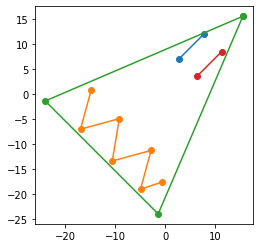

In [8]:
# Rotate the figure by 45 degrees
X_45 = X@Rot(45)
hat_plot(X_45, groups)

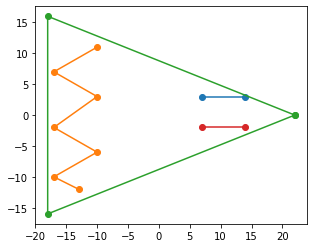

In [9]:
# Rotate the figure by 90 degrees
X_90 = X@Rot(90)
hat_plot(X_90, groups)

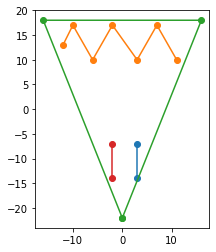

In [10]:
# Rotate the figure by 180 degrees
X_180 = X@Rot(180)
hat_plot(X_180, groups)

# Linear transformation of images (26pt)

## Flipping (mirroring) image (13pt)

    1. (6pt) Construct the “flip-x” matrix Fx. It should be a 2 ×2 matrix that inverses the x-components while leaving y-components intact. You can think in terms of generic matrix multiplication.
    Hint: you can take the unit matrix as the point of departure and see which elements you have to modify to get flip-xinstead.

In [11]:
# Construct the flip-x matrix Fx
Fx = np.array([[-1, 0], [0, 1]])
# Construct the Matrix A
A = np.array([[0, 0], [0, 2], [1, 1]])
# Double check the result, results match
A@Fx

array([[ 0,  0],
       [ 0,  2],
       [-1,  1]])

    2. (5pt) Why should Fx be a 2 ×2 matrix?
     Hint: try something else, e.g. 2 ×3 or 3 ×2 matrix. What is the result?

In [12]:
# Build two examples
three_two = np.array([[0, 0], [0, 2], [0, 0]])
two_three = np.array([[0, 0, 0], [0, 2, 1]])
# Demonstrate examples
print(A@two_three)
print(two_three@A)

[[0 0 0]
 [0 4 2]
 [0 2 1]]
[[0 0]
 [1 5]]


Use A as an example, A is a 3x2 matrix, three_two is also a 3x2 matrix. To multiply two matrices the number of columns of the first matrix must equal the number of rows of the second matrix. In this case, A has 2 columns while three_two has 3 rows, they do not match, and thus multiplication cannot be performed.

When multiplying the two_three, which is a 2x3 matrix, since there are 2 columns in A and 2 rows in two_three, it means that the output will be a 3x3 matrix. When done the other way around, when two_three multiply matrix A, the output matrix will have a dimension of 2x2.

Neither are wanted. Fx must be a 2x2 matrix because only we want the flipped matrix to have 2 columns. When the input matrix is nx2, the only way to keep the output matrix 2 columns is to make the Fx have 2 columns so that the final matrix would be nx2 dimension. The reason why Fx must have 2 rows is that otherwise, it would violate the rule of matrix multiplication: To multiply two matrices, the number of columns of the first matrix must equal the number of rows of the second matrix.

    3. (2pt) Demonstrate that your Fx flips Crazy Hat image. (Note: Crazy Hat is slightly asymmetric.)

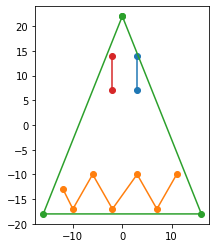

In [13]:
# Demonstate the Fx flips are working
hat_plot(X@Fx, groups)

## Stretch image (13pt)

    1. (5pt) Create the “stretch-y” matrix Sy(s)where sis the “stretch factor”, 2 in the example above.
    Exactly as a above, it should be a 2 ×2 matrix that stretches the y-components while leaving x-components untouched. And you can think in terms of generic matrix multiplication:

In [14]:
# Create a function stretch_y where it takes the input matrix and s(strech factor)
# and returns the streched matrix
def stretch_y (matrix, s):
    S_y = np.array([[1, 0], [0, s]])
    streched_matrix = matrix@S_y
    return streched_matrix

    2. (2pt) Demonstrate that your matrix works correctly by stretching Crazy Hat vertically by factor 2.

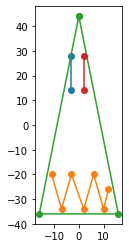

In [15]:
# Prove that th ematrix works correcly
hat_plot(stretch_y(X, 2), groups)

    3. (7pt) Finally, let’s combine these transformation. Use Crazy Hat to perform the following operations:
    flip along the 45◦-line, and stretch it 2×along the 45◦-line (see the example below). I have in mind the 45°line that to SE.
    Note: this task is a bit confusing because “flip” can mean two things. First, it can be understood as moving the points along the 45◦line from one side to the other. This is the meaning we used when talking about “flip-x”, Fx, above. But one can also understand it as if we have to move the points to the opposite side of the line. We use the first meaning here, and would have called the other “flip-y”.
    Hint: instead of creating a new flip-45-deg matrix, you can rotate your image so that the 45°line now aligns with the x-axis, flip over xand rotate it back. Try this!
    Example: here is the flipped-1 a) flipped along the 30°-line; and b) stretched 2×perpendicular to the same line. Try to understand this first on paper, and afterwards to replicate it on computer.    

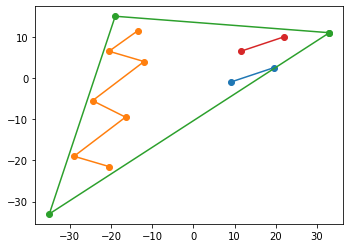

In [16]:
# Rotate image by 45 degrees
rot_45 = X@Rot(-45)
# FLip the image
flip_45 = rot_45@Fx
# Scale it by 2
strech_2 = stretch_y(flip_45, 2)
# Plot the final image
hat_plot(strech_2@Rot(45), groups)

# Rotate Krazy Kat (27 points)

    1. (5 ×3pt) Get the code to run and understand what it does. In particular
    Hint: you may want to consult lecture notes section 2.3.5, in particular the section about bitmap images.

    (a) Get the code to run

Shape: (432, 482)


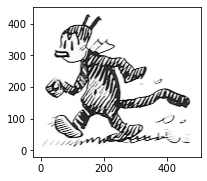

In [17]:
# Read the image file
img = imread('/home/jovyan/INFO371PS/Data/krazy-kat.png')
# Print the shape of the image file, (rows * columns)
print("Shape:", img.shape)
# Create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker='.',
cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

    (b) What is the matrix X that is made by stacking?

X is made by xx.ravel() and yy.ravel(), which is the height and width of the image. Each row in these matrices corresponds to a pair of coordinates of a pixel. 

    (c) How many rows does X have? What does it mean, why does it have this many rows it has?

In [18]:
print('X have', X.shape[0], 'rows')

X have 208224 rows


X has 208224 rows which means that there are 208,224 pixels in this image. From the shape, we can tell the shape is (432, 482) and 482*432 is 208,224. It has that many rows because each row represents the coordinates of a pixel, and there are 208,224 pixels.

    (d) A few lines of X may look like: What do these three lines denote?

The first column of X denotes the horizontal position, the column of the original image matrix, and it runs from 1 to the image width for each row. The second column is the vertical position, the image row, it is 1 for each pixel in the first row, 2 for each pixel in the second row, and so on.

    (e) What is img matrix? If may contain values like (0.9882353, 0.99215686, 0.99607843, 1). What do these values denote?

An image matrix defines the number of rows and columns in the image that is made up of pixels. These values are normalized pixel values which is a single number that represents the brightness/color of the pixel. The pixel value is stored as an 8-bit integer giving a range of possible values from 0 to 255. 

    2. (8pt) Now use matrix multiplication to rotate this image by a few different angles.
    Note: use matrix rotation we did above, various image libraries will not count!
    Suggestion: when you use the code like shown above, it may result in large and slow pdf (or html) files. You can make the pdf faster by:
    (a) instead of plt.show, save the image into a jpg or png file.
    (b) put the resulting saved file into your pdf/html.

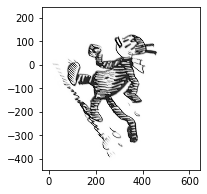

In [19]:
# Rotate the image clock-wise by 60 degrees
new_X = X@Rot(60)
# New figure
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(new_X[:,0], new_X[:,1], c=img.ravel(), marker='.',cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

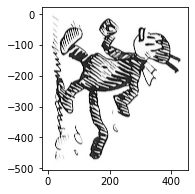

In [20]:
# Rotate the image clock-wise by 90 degrees
new_X_90 = X@Rot(90)
# New figure
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(new_X_90[:,0], new_X_90[:,1], c=img.ravel(), marker='.',cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

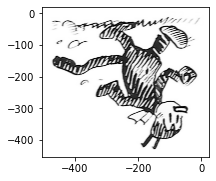

In [21]:
# Rotate the image clock-wise by 180 degrees
new_X_180 = X@Rot(180)
# New figure
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(new_X_180[:,0], new_X_180[:,1], c=img.ravel(), marker='.',cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

    3. (4pt) Use also other transforms (Fx and Sy) to manipulate the image.

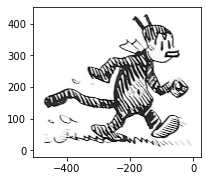

In [22]:
# Flip the image
new_X = X@Fx
# New figure
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(new_X[:,0], new_X[:,1], c=img.ravel(), marker='.',cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

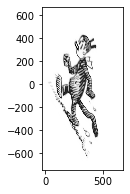

In [23]:
# Rotate the image
img_rot = X@Rot(45)
# Scale it by 2
new_X = stretch_y(img_rot, 2)
# New figure
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(new_X[:,0], new_X[:,1], c=img.ravel(), marker='.',cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

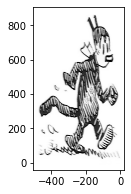

In [24]:
# Scale it by 2 after flipping
new_X = stretch_y(X@Fx, 2)
# New figure
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(new_X[:,0], new_X[:,1], c=img.ravel(), marker='.',cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

# Linear Regression (18pt)

    1. (1pt) Load boston housing data.

In [25]:
# Load the boston housing data
boston_data = pd.read_csv('/home/jovyan/INFO371PS/Data/boston.csv', sep="\t")
# Print the basic info of boston housing data
boston_data.info()
# Print the first five lines of boston housing data
boston_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


    2. (3pt) Run a linear regression model in the form
    medvi +β0 +β1 ·rmi +β2 ·lstati +β3 ·zni +εi (2)
    Use an existing library, such as statsmodels or R’s lm to do this, and display the results table. (You are welcome to pick different variables, feel free to include all of them, just pick more than one.)    

In [26]:
# Build a linear model that takes rmi, lstat, zn in
lm = smf.ols("medv ~ rm + lstat + zn", data = boston_data).fit()
# Print summary information
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          6.65e-111
Time:                        20:54:13   Log-Likelihood:                -1581.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     502   BIC:                             3189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4606      3.171     -0.461      0.645      -7.691       4.770
rm             5.0455      0.446     11.324      0.000       4.170       5.921
lstat         -0.6240      0.046    -13.644      0.000      -0.714      -0.534
zn             0.0158      0.012      1.359      0.175      -0.007       0.039
==============================================================================
Omnibus:                      150.432   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.567
Skew:                           1.376   Prob(JB):                    1.34e-106
Kurtosis:                       6.943   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    3. (8pt) Next, the most complex task–create the design matrix Xfor this regression model. You have to create a matrix that contains four columns: a) column of ones, and b) three columns of the variables you use in the model. See lecture notes 4.1.10 Theoretical considerations, in particular subsections “Linear Regression: The matrix approach” and “Solving the Linear Regression Model”. 
    Example 4.1.12 shows how to create a design matrix.
    The task is actually not complex at all–one line of code is enough, just it may need you to understand the concept of design matrix and learn how to concatenate vectors. This may take a while if you have little experience with matrices.
    Hint: in numpy you can create a column of ones with np.ones() and add a column of ones to a matrix with np.column_stack((ones, X)). In R you can do rbind(1, X).
    In numpy you can transform a data frame to matrix using .values attribute, in R use as.matrix.

In [27]:
# Make a matrix that conatins ones and the columns rm, lstat, and zn from boston_data
variable_matrix = boston_data[['rm', 'lstat', 'zn']].values
X = np.column_stack((np.ones((506, 1)), variable_matrix))

    4. (2pt) Create the outcome vector y. Just transform the medv column to a vector. (In R it will be vector anyway.)

In [28]:
# Create the outcome vector y
y = np.array(boston_data.medv)

    5. (3pt) Compute the solution–your estimate for the parameter vector βusing (1).
    Hint: numpy inverts matrix with function np.linalg.inv, in R you can use solve.

In [29]:
# Follow the equation to estimator for the parameter vector
Xt = np.transpose(X)
XtX = np.dot(Xt,X)
Xty = np.dot(Xt,y)
beta = np.linalg.solve(XtX,Xty)
beta

array([-1.46057734,  5.04554308, -0.62401045,  0.01580778])

    6. (1pt) Compare the results–your computed βestimate should be exactly the same that you see in the linear regression table.

The results I computed using the equation matches exactly with the coefficients from the linear regression function.

# Finally...
How much time did you spend on this PS?

I spent about 10 hours on this PS.